In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

,w,y,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
count,7326.0,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,...,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000,7326.000000
mean,1.0,0.079811,0.016903,0.018974,0.023204,0.027638,0.031068,0.039904,0.045646,0.051259,...,0.036622,0.039024,0.043605,0.045400,0.049477,0.055759,0.060715,0.070436,0.078284,0.081028
std,0.0,0.912495,0.525411,0.524915,0.528490,0.534649,0.538805,0.541786,0.548709,0.554192,...,0.779625,0.791860,0.801430,0.813512,0.825543,0.832994,0.847803,0.862117,0.881227,0.893482
min,1.0,-1.911402,-1.262334,-1.272579,-1.274533,-1.263872,-1.330827,-1.283868,-1.358741,-1.286085,...,-1.760937,-1.759061,-1.758994,-1.798526,-1.867828,-1.786994,-1.858266,-1.893545,-1.942976,-1.842185
25%,1.0,-0.641770,-0.367108,-0.360759,-0.359213,-0.366740,-0.365066,-0.354121,-0.352320,-0.345838,...,-0.559104,-0.557008,-0.557189,-0.571088,-0.584981,-0.580992,-0.599156,-0.605835,-0.608209,-0.630070
50%,1.0,0.154423,-0.003592,-0.001574,0.002993,0.009823,0.017216,0.028255,0.034515,0.045895,...,0.069024,0.078731,0.086139,0.097776,0.114833,0.126746,0.117710,0.134059,0.152927,0.142485
75%,1.0,0.847007,0.384624,0.380424,0.386953,0.409558,0.426038,0.444288,0.444514,0.465356,...,0.633095,0.662089,0.669721,0.689635,0.703783,0.719244,0.749348,0.771733,0.808768,0.821933
max,1.0,1.916584,1.385602,1.409508,1.423429,1.440747,1.391851,1.375212,1.409847,1.395246,...,1.772466,1.779313,1.735670,1.729854,1.763416,1.820125,1.872739,1.897289,1.929303,1.869503


In [4]:
test

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.670595,-0.839068,-0.734415,-0.587261,-0.788800,-0.975857,-0.774088,-1.021334,-1.110286,-0.893337,...,-0.997627,-1.103794,-1.092988,-0.989165,-0.827528,-0.813729,-0.532411,-0.289483,-0.407720,-0.407505
1,0.188165,0.166410,0.321011,0.318078,0.641710,0.951932,1.170069,1.177711,0.987763,0.981345,...,0.743405,0.916254,0.866453,0.953677,0.716259,0.692816,0.446713,0.539733,0.279293,0.180641
2,0.886510,0.760716,0.751800,0.052198,-0.050958,-0.140734,-0.173480,0.178508,0.198187,0.357906,...,0.444142,0.492294,0.573348,0.546323,0.373874,0.699132,0.808303,1.118522,1.284887,1.541929
3,-0.187722,0.030199,-0.072558,-0.098400,-0.110795,-0.127632,-0.241193,-0.374608,-0.651771,-0.513491,...,-0.340927,-0.268253,-0.654777,-1.133722,-1.484557,-1.446644,-1.654337,-1.521009,-1.593825,-1.110684
4,0.248822,0.168815,0.260804,0.505885,0.471486,1.018661,0.971406,1.062348,0.986871,0.947982,...,0.422044,0.688196,0.382416,0.344843,0.177595,0.330549,0.595061,0.884860,1.125103,1.220779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,1.033977,1.043510,1.029088,1.038866,1.044243,1.032999,1.034221,1.027377,1.027377,1.005378,...,0.977756,0.944023,0.945001,0.938646,0.955268,0.945735,0.940112,0.943290,0.956245,0.947446
3137,0.998393,0.997933,0.989993,1.001384,0.995516,0.983090,0.989993,0.981479,0.993330,0.995679,...,1.017606,1.025608,1.027689,1.026088,1.026248,1.024808,1.022247,1.024488,1.025288,1.017286
3138,1.288652,1.279170,1.271384,1.280467,1.276575,1.245434,1.208504,1.207506,1.064278,1.063479,...,1.023056,1.022158,1.032638,1.026849,1.016369,1.014872,1.013774,1.023356,1.026450,1.028047
3139,0.804169,0.821925,0.824755,0.836336,0.840196,0.827586,0.834277,0.833762,0.828101,0.832733,...,1.101904,1.101132,1.083119,1.113742,1.130468,1.122491,1.126608,1.134843,1.133042,1.113484


In [5]:
targets = train['y']

In [6]:
train = train.drop(columns=['y','w'])

In [7]:
# define min max scaler
scaler = MinMaxScaler()
scaler = MaxAbsScaler()
scaler = StandardScaler()

# transform data
cols = [f'{i}' for i in range (50)]
train[cols] = scaler.fit_transform(train[cols])

train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.473380,1.302358,0.955648,0.507111,-0.010355,-0.393880,-0.530256,-0.823445,-0.765791,-0.164422,...,1.177141,1.395390,1.641736,1.273160,1.592917,1.673110,1.338512,1.305661,1.233640,0.772404
1,1.424475,1.115568,0.739882,0.400290,0.279887,-0.132578,-0.211899,-0.428109,-0.437151,0.383196,...,0.673348,0.807094,1.004954,1.338058,1.201618,1.425135,1.400665,1.462675,1.349165,1.356235
2,1.305604,1.178813,1.466944,1.360661,1.251295,0.914605,1.034285,0.899520,0.748029,0.661196,...,1.657412,1.623164,1.533968,1.265447,0.853404,0.580997,0.402628,0.431900,0.464468,0.691700
3,0.002807,-0.221519,-0.083365,-0.207559,-0.556045,-0.971370,-1.415740,-1.760730,-1.883560,-2.516417,...,-0.542988,-0.501347,-0.818187,-0.913955,-1.140255,-1.420735,-1.883106,-1.811040,-2.196093,-1.704123
4,0.849331,1.231393,0.801866,0.847607,0.670850,0.497142,0.205616,0.252102,0.391566,0.247023,...,-0.271387,-0.718060,-0.293903,-0.373091,-0.717006,-0.565019,-0.644409,-0.973549,-0.840768,-0.327801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,1.876208,1.883376,1.831151,1.836686,1.816896,1.803459,1.704366,1.566069,1.618514,1.600551,...,1.240904,1.232736,1.211619,1.213789,1.194198,1.177196,1.140504,1.110838,1.083161,1.053034
7322,1.999932,2.012557,1.977732,1.980653,1.961981,1.904541,1.897345,1.846402,1.821126,1.769551,...,1.264691,1.277377,1.274008,1.241438,1.220874,1.191414,1.167158,1.134478,1.104766,1.078077
7323,1.827227,1.827655,1.797092,1.777848,1.756158,1.714139,1.680463,1.630183,1.620579,1.606442,...,1.300441,1.306511,1.280204,1.266676,1.239488,1.213346,1.189792,1.165011,1.131039,1.105254
7324,1.589435,1.590090,1.605195,1.591595,1.581007,1.550989,1.531828,1.499694,1.481174,1.462716,...,1.290734,1.271182,1.242842,1.248176,1.216507,1.190271,1.169392,1.136811,1.110023,1.092333


In [8]:
features_and_targets = pd.concat([train, targets], axis=1)

In [9]:
corr_matrix = features_and_targets.corr()
corr_matrix['y']

0     0.613172
1     0.618793
2     0.621057
3     0.614287
4     0.602994
5     0.589865
6     0.584518
7     0.580042
8     0.579152
9     0.588522
10    0.601310
11    0.612443
12    0.626453
13    0.642289
14    0.657419
15    0.666290
16    0.673230
17    0.677283
18    0.681082
19    0.679991
20    0.683424
21    0.688972
22    0.701411
23    0.715419
24    0.726833
25    0.745667
26    0.765639
27    0.783774
28    0.802625
29    0.819507
30    0.828819
31    0.831443
32    0.826190
33    0.808870
34    0.779100
35    0.743946
36    0.709549
37    0.683334
38    0.664611
39    0.656926
40    0.658175
41    0.670157
42    0.684724
43    0.708149
44    0.745744
45    0.790237
46    0.843251
47    0.898601
48    0.944832
49    0.977203
y     1.000000
Name: y, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

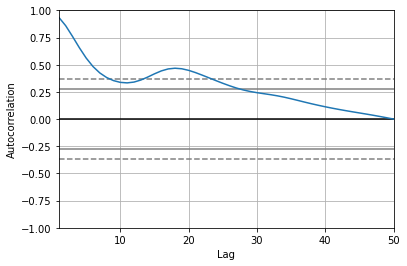

In [10]:
autocorrelation_plot(train.transpose())

In [12]:
train_set, test_set = train_test_split(features_and_targets,test_size=0.2,train_size=0.8)

In [13]:
train_set_features = train_set.drop(columns="y")
train_set_targets = train_set["y"]


lin_reg = LinearRegression().fit(train_set_features,train_set_targets)

#len(train_set_features)

In [21]:
test_set_features = test_set.drop(columns=["y"])
test_set_targets = test_set["y"]

train_predictions = lin_reg.predict(train_set_features)
test_predictions = lin_reg.predict(test_set_features)

# We can check what MSE we get for random predictions. 
# If this is not significantly worse than for our true predictions, something is wrong!

from numpy.random import permutation

print("Test: ", (mean_squared_error(test_set_targets,test_predictions)))
print("Test_Random: ", (mean_squared_error(permutation(test_set_targets),test_predictions)))
print("Train: ", (mean_squared_error(train_set_targets,train_predictions)))
print("Train_Random: ", (mean_squared_error(permutation(train_set_targets),train_predictions)))

Test:  0.023763696369774906
Test_Random:  1.7964849148279396
Train:  0.022451234833032636
Train_Random:  1.674585595893937


<AxesSubplot:ylabel='Density'>

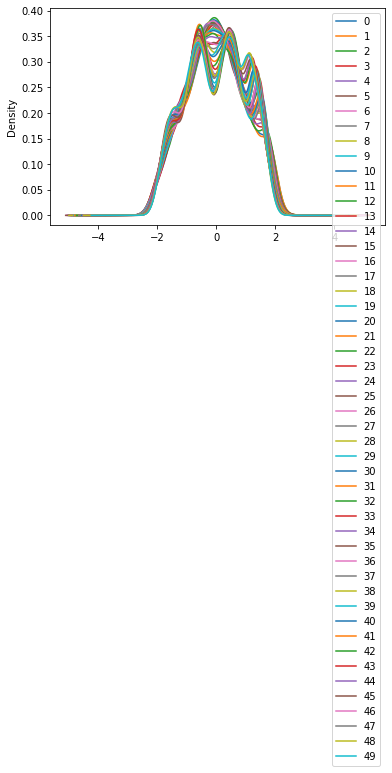

In [23]:
train.plot(kind='kde')